# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings

In [4]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [5]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Colab Notebooks/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)



        # Reading the current file
        current_data = pd.read_parquet(file_path)
        current_data['tpep_pickup_datetime']  =  pd.to_datetime(current_data['tpep_pickup_datetime'],errors='coerce')
        current_data['date'] =  current_data['tpep_pickup_datetime'].dt.date
        current_data['hour'] =  current_data['tpep_pickup_datetime'].dt.hour

        for date in current_data['date'].unique():
          date_data = current_data[current_data['date'] == date]
          for hour in date_data['hour'].unique():
              hour_data = date_data[date_data['hour'] == hour]


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
              sampled_data = pd.DataFrame()
              sampled_hour_data = hour_data.sample(frac=0.05, random_state=42)
              sampled_data = pd.concat([sampled_data, sampled_hour_data], ignore_index=True)

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
              df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier
    except Exception as e:
      print(f"Error reading file {file_name}: {e}")

Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'


In [1]:
df.shape

NameError: name 'df' is not defined

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
sample_output_file = '/content/drive/MyDrive/Colab Notebooks/sample_output_file.parquet'
df.to_parquet(sample_output_file,engine = 'pyarrow')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file

df =  pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/sample_output_file.parquet')

In [7]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 00:01:37   2023-08-01 00:14:40              1.0   
1         1  2023-08-01 00:07:11   2023-08-01 00:14:27              0.0   
2         2  2023-08-01 00:47:59   2023-08-01 01:10:40              1.0   
3         1  2023-08-01 00:57:38   2023-08-01 01:30:57              2.0   
4         2  2023-08-01 00:14:59   2023-08-01 00:51:28              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.53         1.0                  N            45            33   
1           0.90         1.0                  N           234            68   
2           5.59         1.0                  N           234             7   
3          15.50         1.0                  N           132            37   
4          17.15         2.0                  N           132           164   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.84          0.00   
1             1  ...      0.5        2.70          0.00   
2             1  ...      0.5        6.50          0.00   
3             1  ...      0.5       13.05          0.00   
4             1  ...      0.5        0.00          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         23.04                   2.5         0.00   
1                    1.0         16.30                   2.5         0.00   
2                    1.0         39.00                   2.5         0.00   
3                    1.0         78.40                   0.0         1.75   
4                    1.0         82.30                   2.5         1.75   

         date  hour airport_fee  
0  2023-08-01     0         NaN  
1  2023-08-01     0         NaN  
2  2023-08-01     0         NaN  
3  2023-08-01     0         NaN  
4  2023-08-01     0         NaN  

[5 rows x 22 columns]

In [8]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed

df = df.drop(columns=['store_and_fwd_flag'])

# Reset the index to ensure it's in sequential order
df = df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns into a new column
df['airport_fee_final'] = df['airport_fee'].fillna(df['Airport_fee'])

# Drop the original columns 'airport_fee' and 'Airport_fee'
df = df.drop(columns=['airport_fee', 'Airport_fee'])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [11]:
# check where values of fare amount are negative
negative_fare_amount = df[df['fare_amount']<0]

Did you notice something different in the `RatecodeID` column for above records?


#There is no negative fare amount so nothing to analyse with RatecodeID

In [12]:
negative_fare_amount = df[df['fare_amount']  < 0]
negative_fare_amount

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee_final]
Index: []

In [13]:
# Find which columns have negative values
# Select columns with numerical data types
monetary_values = df.select_dtypes(include=['number'])

# Check if any values in the columns are negative
negative_columns = (monetary_values < 0).any()

# Display the columns with negative values
negative_columns[negative_columns]

extra                    True
mta_tax                  True
improvement_surcharge    True
total_amount             True
congestion_surcharge     True
airport_fee_final        True
dtype: bool

In [14]:
# fix these negative values
# List of columns with negative values
columns_with_negatives = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_final']

# Replace negative values with the median of the respective column
for column in columns_with_negatives:
    median_value = df[column].median()  # Calculate the median for the column
    df[column] = df[column].apply(lambda x: median_value if x < 0 else x)

# Check the changes
print(df[columns_with_negatives].head())

   extra  mta_tax  improvement_surcharge  total_amount  congestion_surcharge  \
0   1.00      0.5                    1.0         23.04                   2.5   
1   3.50      0.5                    1.0         16.30                   2.5   
2   1.00      0.5                    1.0         39.00                   2.5   
3   2.75      0.5                    1.0         78.40                   0.0   
4   0.00      0.5                    1.0         82.30                   2.5   

   airport_fee_final  
0               0.00  
1               0.00  
2               0.00  
3               1.75  
4               1.75  


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [15]:
# Find the proportion of missing values in each column

missing_percentage = df.isnull().mean()*100

# Display the missing percentage
print(missing_percentage)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
date                     0.000000
hour                     0.000000
airport_fee_final        3.420903
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [16]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


<ipython-input-16-76b2d2abbf8d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [17]:
#check if passenger_count is having 0 value
df[df['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               1  2023-08-01 00:07:11   2023-08-01 00:14:27              0.0   
85              1  2023-08-01 01:08:31   2023-08-01 02:03:35              0.0   
188             1  2023-08-01 06:09:01   2023-08-01 06:14:39              0.0   
230             1  2023-08-01 06:56:56   2023-08-01 07:43:48              0.0   
244             1  2023-08-01 06:28:23   2023-08-01 06:34:46              0.0   
...           ...                  ...                   ...              ...   
1896099         1  2023-12-31 22:45:00   2023-12-31 23:07:43              0.0   
1896132         1  2023-12-31 22:38:04   2023-12-31 22:40:34              0.0   
1896268         1  2023-12-31 23:13:06   2023-12-31 23:17:16              0.0   
1896304         1  2023-12-31 23:44:04   2023-12-31 23:53:59              0.0   
1896366         1  2023-12-31 23:06:18   2023-12-31 23:25:09              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1                  0.9         1.0           234            68             1   
85                27.5         1.0           132           265             1   
188                0.9         1.0           186           230             1   
230               17.6         2.0           132           100             1   
244                1.1         1.0           161            50             1   
...                ...         ...           ...           ...           ...   
1896099            1.4         1.0           186           186             2   
1896132            0.8         1.0           107           137             1   
1896268            0.7         1.0            24           151             1   
1896304            1.5         1.0           229           164             4   
1896366            2.0         1.0           246           143             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1                8.6   3.50      0.5        2.70          0.00   
85             103.8   5.25      0.5       10.00         12.75   
188              7.2   2.50      0.5        2.20          0.00   
230             70.0   4.25      0.5        5.00          6.55   
244              7.9   2.50      0.5        2.95          0.00   
...              ...    ...      ...         ...           ...   
1896099         19.1   3.50      0.5        0.00          0.00   
1896132          5.8   3.50      0.5        0.00          0.00   
1896268          8.6   1.00      0.5        2.20          0.00   
1896304         11.4   3.50      0.5        0.00          0.00   
1896366         18.4   3.50      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
1                          1.0         16.30                   2.5   
85                         1.0        133.30                   2.5   
188                        1.0         13.40                   2.5   
230                        1.0         87.30                   2.5   
244                        1.0         14.85                   2.5   
...                        ...           ...                   ...   
1896099                    1.0         24.10                   2.5   
1896132                    1.0         10.80                   2.5   
1896268                    1.0         13.30                   0.0   
1896304                    1.0         16.40                   2.5   
1896366                    1.0         23.40                   2.5   

               date  hour  airport_fee_final  
1        2023-08-01     0               0.00  
85       2023-08-01     1               1.75  
188      2023-08-01     6               0.00  
230      2023-08-01     6               1.75  
244      2023-08-01     6               0.00  
...             ...   ...                ...  
1896099  2023-12-31    22               0.00  
1896132  2023-12-31    22               0.00  
1896268  2023-12-3

In [18]:
# Calculate the median of the 'passenger_count' column
median_passenger_count = df['passenger_count'].median()

# Replace 0 values with the median
df['passenger_count'] = df['passenger_count'].apply(lambda x: median_passenger_count if x == 0 else x)


In [19]:
#check the results
df[df['passenger_count']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee_final]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'].fillna(1, inplace=True)  # Default to Standard rate

<ipython-input-20-6e0141416d35>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1, inplace=True)  # Default to Standard rate


In [21]:
#check result
df[df['RatecodeID'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee_final]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge

# Calculate the median of 'congestion_surcharge' column
median_congestion_surcharge = df['congestion_surcharge'].median()

# Replace null values with the median
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(median_congestion_surcharge)


In [23]:
#check result
df['congestion_surcharge'].isna().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [24]:
# Handle any remaining missing values

df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
date                     0.000000
hour                     0.000000
airport_fee_final        3.420903
dtype: float64

In [25]:
# Calculate the median of 'airport_fee_final' column
median_airport_fee_final = df['airport_fee_final'].median()

# Replace null values with the median
df['airport_fee_final'] = df['airport_fee_final'].fillna(median_airport_fee_final)

In [26]:
#check if any missing values further
df.isnull().mean()*100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
date                     0.0
hour                     0.0
airport_fee_final        0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

#Outliers for numerical values

numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
# Identify outliers in the dataset
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))

# Display the number of outliers per column
outliers_count = outliers.sum()
print(outliers_count)

VendorID                    444
passenger_count          424621
trip_distance            249302
RatecodeID               102267
PULocationID                  0
DOLocationID                  0
payment_type             404026
fare_amount              197413
extra                     34047
mta_tax                   17871
tip_amount               145673
tolls_amount             153802
improvement_surcharge      2181
total_amount             218083
congestion_surcharge     140898
hour                          0
airport_fee_final        160947
dtype: int64


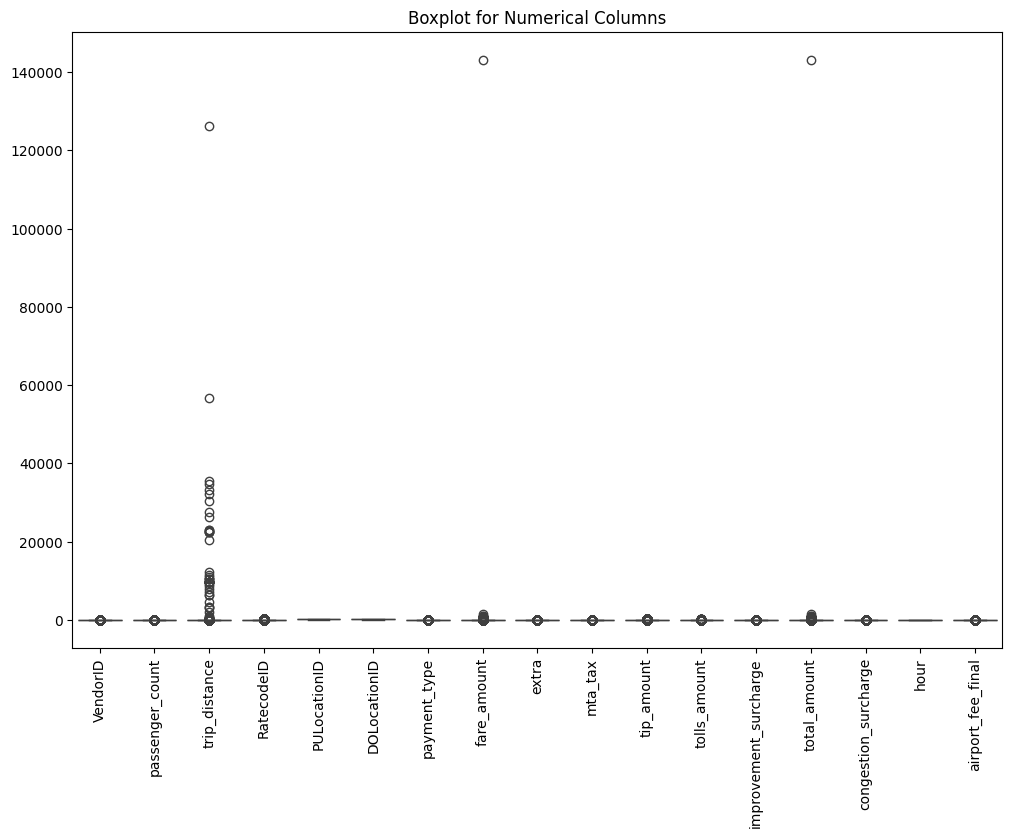

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical columns to visualize outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Columns')
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [30]:
# Continue with outlier handling
# outlier handling of trip distance

q1 = df['trip_distance'].quantile(0.25)
q2 = df['trip_distance'].median()
q3 = df['trip_distance'].quantile (0.75)

IQR =  q3-q1

lower_bound_trip_distance =  q1-1.5* IQR
upper_bound_trip_distance =  q3+1.5*IQR

print(lower_bound_trip_distance, upper_bound_trip_distance)


# Removing outliers based on IQR
df=df[(df['trip_distance'] >= lower_bound_trip_distance) & (df['trip_distance'] <= upper_bound_trip_distance)]

-2.4749999999999996 6.924999999999999


In [31]:
#outlier handling of fare amount
q1 = df['fare_amount'].quantile(0.25)
q2 = df['fare_amount'].median()
q3 = df['fare_amount'].quantile (0.75)

IQR =  q3-q1

lower_bound_fare_amount =  q1-1.5* IQR
upper_bound_fare_amount  =  q3+1.5*IQR

print(lower_bound_fare_amount, upper_bound_fare_amount)
# Removing outliers based on IQR
df = df[(df['fare_amount'] >= lower_bound_fare_amount) & (df['fare_amount'] <= upper_bound_fare_amount)]

-5.049999999999999 31.349999999999998


How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [32]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df[(df['trip_distance'] ==0) & ( df['fare_amount'] > 300)] # its already handled in outliers

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee_final]
Index: []

In [33]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df= df[~((df['trip_distance'] ==0) & ( df['fare_amount'] ==0) & (df['PULocationID'] != df['DOLocationID']))]

In [34]:
df.shape

(1598194, 20)

First, let us remove 7+ passenger counts as there are very less instances.

In [35]:
# remove passenger_count > 6
# Remove rows where passenger_count is greater than 6
df = df[df['passenger_count'] <= 6]

# Check if the operation is successful
df['passenger_count'].value_counts()


passenger_count
1.0    1253060
2.0     223696
3.0      56566
4.0      30636
5.0      20625
6.0      13611
Name: count, dtype: int64

In [36]:
df.shape

(1598194, 20)

In [37]:
#outlier handling for categorical columns
#ratecodeid

df['RatecodeID'].value_counts()

RatecodeID
1.0     1589903
99.0       5037
5.0        2579
3.0         523
4.0         108
2.0          41
6.0           3
Name: count, dtype: int64

In [38]:
#remove the outlier for RatecodeId
df = df[df['RatecodeID']<99]

In [39]:
#check the result
df['RatecodeID'].value_counts()

RatecodeID
1.0    1589903
5.0       2579
3.0        523
4.0        108
2.0         41
6.0          3
Name: count, dtype: int64

In [40]:
# Do any columns need standardising?
#outlier analysis for payment type categorical column

df['payment_type'].value_counts()


payment_type
1    1257282
2     265846
0      50987
4      11276
3       7766
Name: count, dtype: int64

In [41]:
df = df[df['payment_type']!=0]

In [42]:
df['VendorID'].value_counts() #Looks no outliers in this .

VendorID
2    1131777
1     410393
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [43]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee_final']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#Numerical Variables:

#passenger_count, trip_distance, PULocationID, DOLocationID, pickup_hour, trip_duration, and the monetary columns (fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee)

#Categorical Variables:

#VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, RatecodeID, payment_type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [44]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month
df['hour'] = df['tpep_pickup_datetime'].dt.hour


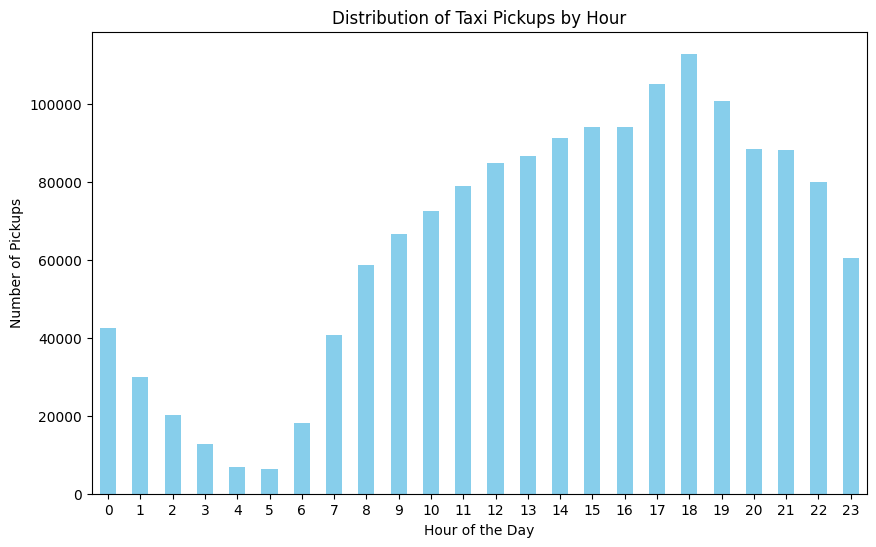

In [45]:
# Find and show the hourly trends in taxi pickp
plt.figure(figsize=(10, 6))
df['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()

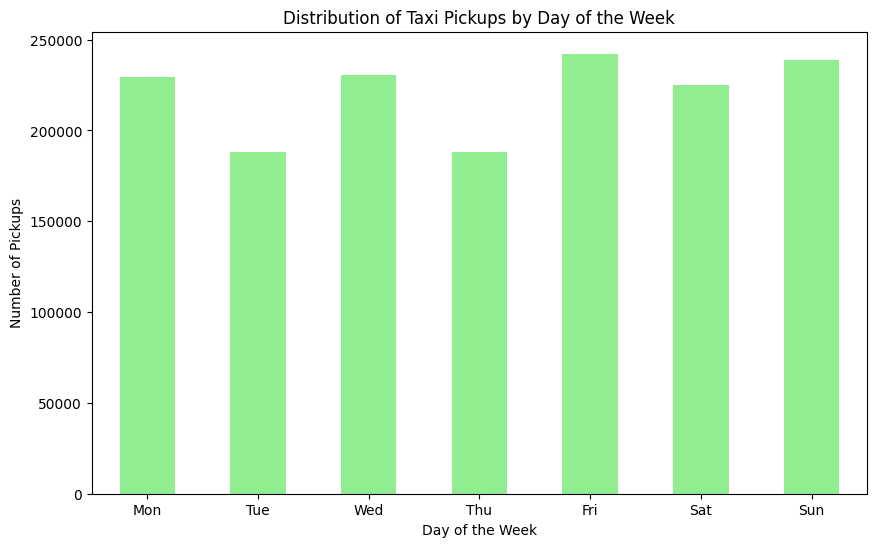

In [46]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

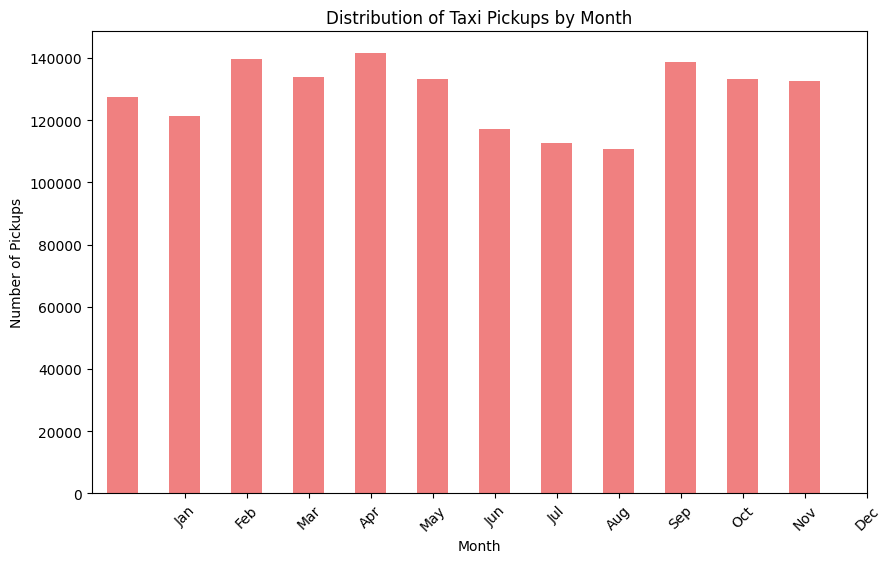

In [47]:
# Show the monthly trends in pickups

plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [48]:
# Analyse the above parameters
# Check for zero/negative values in the relevant columns
negative_values = {
    'fare_amount': (df['fare_amount'] <= 0).sum(),
    'tip_amount': (df['tip_amount'] <= 0).sum(),
    'total_amount': (df['total_amount'] <= 0).sum(),
    'trip_distance': (df['trip_distance'] <= 0).sum()
}

print(negative_values)

{'fare_amount': np.int64(480), 'tip_amount': np.int64(331305), 'total_amount': np.int64(225), 'trip_distance': np.int64(15522)}


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [49]:
df1 = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()




In [50]:
df1.shape

(1205642, 22)

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# df1 has been created above with non zero values


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [51]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee_final',
       'day_of_week', 'month'],
      dtype='object')

<Axes: title={'center': 'Monthly Revenue'}, xlabel='month'>

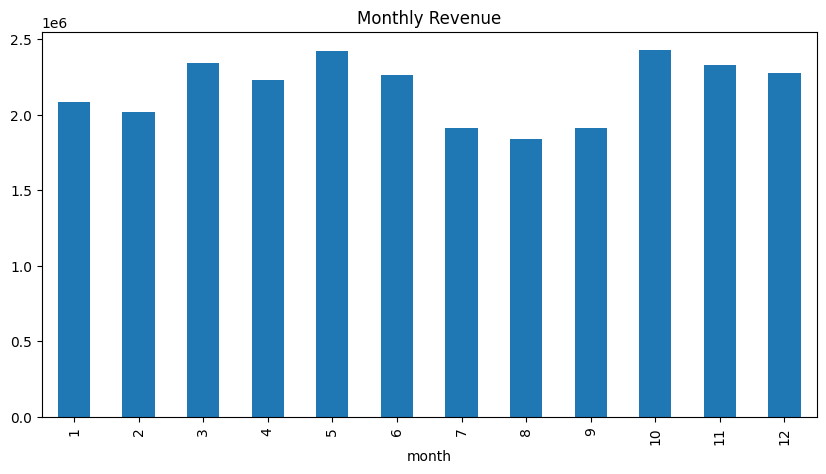

In [52]:
# Group data by month and analyse monthly revenue
# Monthly revenue
monthly_revenue = df1.groupby('month')['total_amount'].sum()
monthly_revenue.plot(kind='bar', figsize=(10, 5), title='Monthly Revenue')


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [53]:
# Calculate proportion of each quarter

df1['Quarter'] = df1['month'].apply(lambda month: 'Q1' if month in [1, 2, 3]
                                    else ('Q2' if month in [4,5,6]
                                          else ('Q3' if month in [7,8,9]
                                                else 'Q4')))
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 00:01:37   2023-08-01 00:14:40              1.0   
1         1  2023-08-01 00:07:11   2023-08-01 00:14:27              1.0   
2         2  2023-08-01 00:47:59   2023-08-01 01:10:40              1.0   
5         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
9         1  2023-08-01 00:26:16   2023-08-01 00:35:48              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.53         1.0            45            33             1   
1           0.90         1.0           234            68             1   
2           5.59         1.0           234             7             1   
5           3.67         1.0           137            75             1   
9           0.90         1.0           163            50             1   

   fare_amount  ...  tolls_amount  improvement_surcharge  total_amount  \
0         14.2  ...           0.0                    1.0         23.04   
1          8.6  ...           0.0                    1.0         16.30   
2         27.5  ...           0.0                    1.0         39.00   
5         16.3  ...           0.0                    1.0         25.56   
9          8.6  ...           0.0                    1.0         16.30   

   congestion_surcharge        date  hour  airport_fee_final day_of_week  \
0                   2.5  2023-08-01     0                0.0     Tuesday   
1                   2.5  2023-08-01     0                0.0     Tuesday   
2                   2.5  2023-08-01     0                0.0     Tuesday   
5                   2.5  2023-08-01     0                0.0     Tuesday   
9                   2.5  2023-08-01     0                0.0     Tuesday   

   month  Quarter  
0      8       Q3  
1      8       Q3  
2      8       Q3  
5      8       Q3  
9      8       Q3  

[5 rows x 23 columns]

<Axes: xlabel='Quarter'>

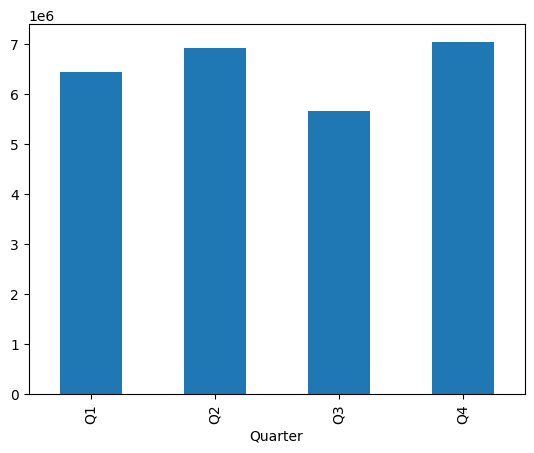

In [54]:
quarter_revenue = df1.groupby('Quarter')['total_amount'].sum()
quarter_revenue.plot(kind= 'bar')


In [56]:
quarter_revenue

Quarter
Q1    6445611.23
Q2    6921723.31
Q3    5665120.51
Q4    7038861.95
Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

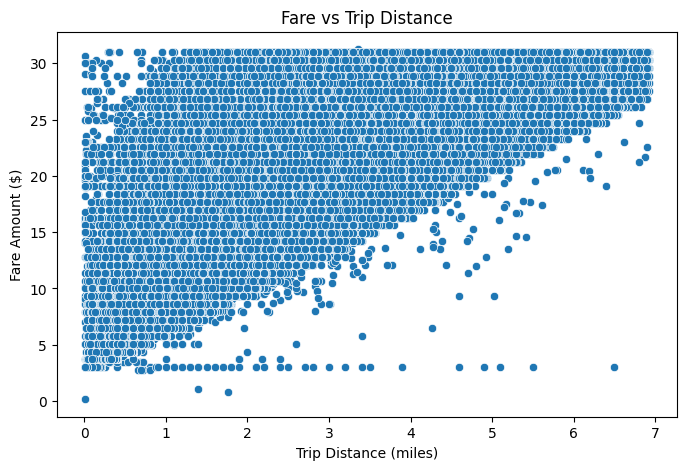

In [55]:
# Show how trip fare is affected by distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1['trip_distance'], y=df1['fare_amount'])
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare vs Trip Distance')
plt.show()


In [58]:
correlation = df1['trip_distance'].corr(df1['fare_amount'])
correlation

np.float64(0.8804223890740515)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [56]:

# Ensure both columns are in datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# Calculate trip duration in seconds (difference between dropoff and pickup)
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds()

# Optionally, convert seconds to minutes
df1['trip_duration_minutes'] = df1['trip_duration'] / 60


               fare_amount  trip_duration
fare_amount       1.000000       0.212733
trip_duration     0.212733       1.000000


Text(0, 0.5, 'Trip Duration (minutes)')

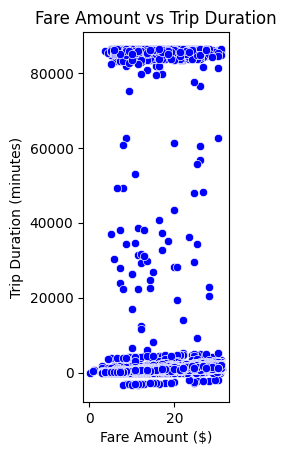

In [57]:
# Show relationship between fare and trip duration

# Calculate correlation between fare_amount and trip_duration
correlation_fare_duration = df1[['fare_amount', 'trip_duration']].corr()
print(correlation_fare_duration)

# Plot correlation: fare_amount vs trip_duration
plt.subplot(1, 3, 1)
sns.scatterplot(x=df1['fare_amount'], y=df1['trip_duration'], color='blue')
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Duration (minutes)')

                 fare_amount  passenger_count
fare_amount         1.000000         0.017887
passenger_count     0.017887         1.000000


Text(0, 0.5, 'Passenger Count')

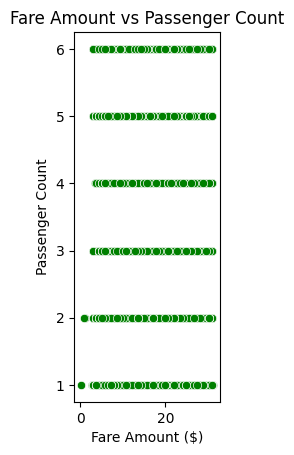

In [58]:
# Show relationship between fare and number of passengers

# Calculate correlation between fare_amount and passenger_count
correlation_fare_passenger = df1[['fare_amount', 'passenger_count']].corr()
print(correlation_fare_passenger)

# Plot correlation: fare_amount vs passenger_count
plt.subplot(1, 3, 2)
sns.scatterplot(x=df1['fare_amount'], y=df1['passenger_count'], color='green')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Passenger Count')


               tip_amount  trip_distance
tip_amount       1.000000       0.516705
trip_distance    0.516705       1.000000


Text(0, 0.5, 'Trip Distance (miles)')

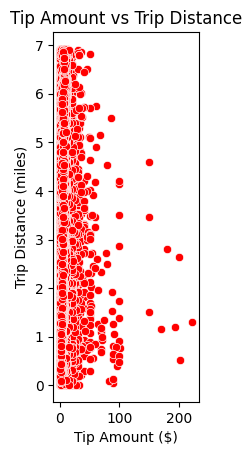

In [59]:
# Show relationship between tip and trip distance
# Calculate correlation between tip_amount and trip_distance
correlation_tip_distance = df1[['tip_amount', 'trip_distance']].corr()
print(correlation_tip_distance)

plt.subplot(1, 3, 3)
sns.scatterplot(x=df1['tip_amount'], y=df1['trip_distance'], color='red')
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Trip Distance (miles)')


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1205604
2         21
4         12
3          5
Name: count, dtype: int64


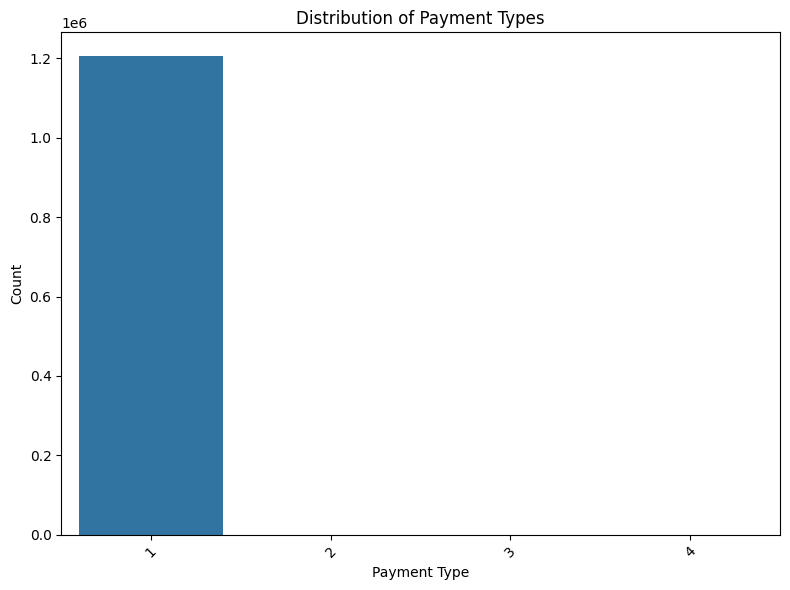

In [60]:
# Analyse the distribution of different payment types (payment_type).

payment_type_distribution = df1['payment_type'].value_counts()
print(payment_type_distribution)

# Visualize the distribution of payment types

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_distribution.index, y=payment_type_distribution.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [61]:
pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [62]:
 import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/trip_records/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

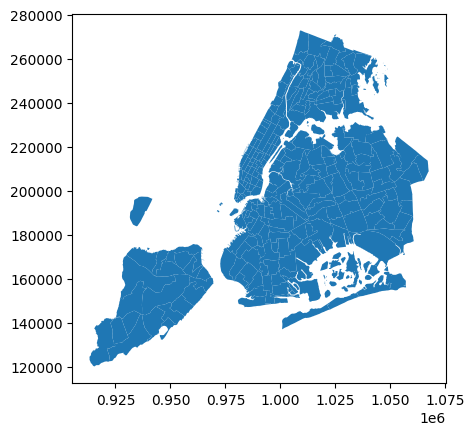

In [63]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [64]:
# check the columns of df to get the column names for joining
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee_final',
       'day_of_week', 'month', 'Quarter', 'trip_duration',
       'trip_duration_minutes'],
      dtype='object')

In [65]:
# Merge zones and trip records using locationID and PULocationID

df_merged =  pd.merge(df1, zones, left_on= 'PULocationID', right_on= 'LocationID', how = 'inner')
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 00:01:37   2023-08-01 00:14:40              1.0   
1         1  2023-08-01 00:07:11   2023-08-01 00:14:27              1.0   
2         2  2023-08-01 00:47:59   2023-08-01 01:10:40              1.0   
3         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
4         1  2023-08-01 00:26:16   2023-08-01 00:35:48              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.53         1.0            45            33             1   
1           0.90         1.0           234            68             1   
2           5.59         1.0           234             7             1   
3           3.67         1.0           137            75             1   
4           0.90         1.0           163            50             1   

   fare_amount  ...  Quarter  trip_duration  trip_duration_minutes  OBJECTID  \
0         14.2  ...       Q3          783.0              13.050000        45   
1          8.6  ...       Q3          436.0               7.266667       234   
2         27.5  ...       Q3         1361.0              22.683333       234   
3         16.3  ...       Q3          661.0              11.016667       137   
4          8.6  ...       Q3          572.0               9.533333       163   

   Shape_Leng  Shape_Area           zone LocationID    borough  \
0    0.045907    0.000091      Chinatown         45  Manhattan   
1    0.036072    0.000073       Union Sq        234  Manhattan   
2    0.036072    0.000073       Union Sq        234  Manhattan   
3    0.046108    0.000116       Kips Bay        137  Manhattan   
4    0.034177    0.000041  Midtown North        163  Manhattan   

                                            geometry  
0  POLYGON ((984941.821 199431.157, 984958.446 19...  
1  POLYGON ((987029.847 207022.299, 987048.27 206...  
2  POLYGON ((987029.847 207022.299, 987048.27 206...  
3  POLYGON ((991954.728 209026.462, 991949.076 20...  
4  POLYGON ((989412.663 219020.943, 990045.841 21...  

[5 rows x 32 columns]

In [66]:
df_merged.shape

(1195773, 32)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [68]:
# Group data by location and calculate the number of trips
no_of_trips_by_location = df1.groupby('PULocationID').size().reset_index(name='total_trips')
no_of_trips_by_location.sort_values(by ='total_trips',ascending =  False)

PULocationID  total_trips
170           237        67101
111           161        62284
169           236        60644
112           162        48911
96            142        46471
..            ...          ...
144           207            1
128           185            1
145           208            1
143           203            1
173           240            1

[191 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [69]:
# Merge trip counts back to the zones GeoDataFrame

gdf = gpd.GeoDataFrame(df_merged, geometry='geometry')
# Merge using a left join to preserve all zones
gdf_with_trips = gdf.merge(no_of_trips_by_location, left_on='LocationID', right_on='PULocationID', how='left')

# You can fill NaN values with 0 if you want to show these zones as having 0 trips
gdf_with_trips['total_trips'].fillna(0, inplace=True)


<ipython-input-69-5ac36811326a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf_with_trips['total_trips'].fillna(0, inplace=True)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Text(120.60102835976947, 0.5, 'Latitude')

<Figure size 1200x1000 with 0 Axes>

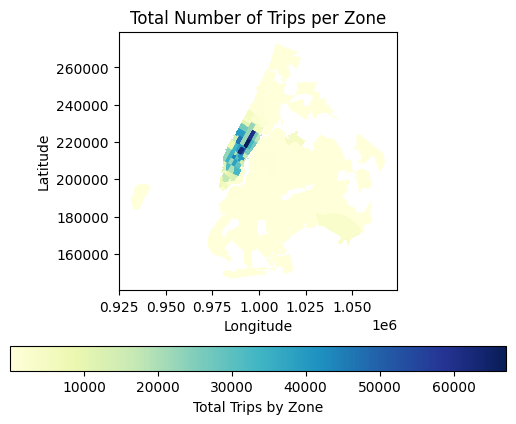

In [70]:
# Define figure and axis
plt.figure(figsize=(12, 10))


# Plot the map and display it
gdf_with_trips.plot(column='total_trips', cmap='YlGnBu', legend=True,
                    legend_kwds={'label': "Total Trips by Zone",
                                 'orientation': "horizontal"})

# Set title and axis labels
plt.title('Total Number of Trips per Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [71]:
# can you try displaying the zones DF sorted by the number of trips?
gdf_with_trips_sorted  = gdf_with_trips.sort_values(by= 'total_trips', ascending= False)

# Display the first few rows of the sorted GeoDataFrame
print(gdf_with_trips_sorted[['LocationID', 'zone', 'total_trips']].head())

         LocationID                   zone  total_trips
33              237  Upper East Side South        67101
778332          237  Upper East Side South        67101
778367          237  Upper East Side South        67101
1126022         237  Upper East Side South        67101
129402          237  Upper East Side South        67101


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [73]:
# Find routes which have the slowest speeds at different times of the day

# Group by PULocationID, DOLocationID, and hour to calculate the average trip duration and total distance
route_data = df1.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    average_trip_duration=('trip_duration', 'mean'),
    total_distance=('trip_distance', 'sum')
).reset_index()

# Calculate speed for each route and hour (Speed = Distance / Duration)
route_data['speed'] = route_data['total_distance'] / route_data['average_trip_duration']

# Sort by speed to find the slowest routes
slow_routes = route_data.sort_values(by='speed').head(10)

# Display slow routes
print(slow_routes[['PULocationID', 'DOLocationID', 'hour', 'speed']])

       PULocationID  DOLocationID  hour     speed
43386           164            33     1 -0.673026
63909           238           263     1 -0.067610
16578            90            88     1 -0.050537
59689           234           211     1 -0.027087
63662           238           233     1 -0.013519
10366            68           226     1 -0.012505
22871           114           106     1 -0.001361
49105           198            36     1 -0.000539
25545           132           149    13  0.000005
41163           162           162     4  0.000018


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

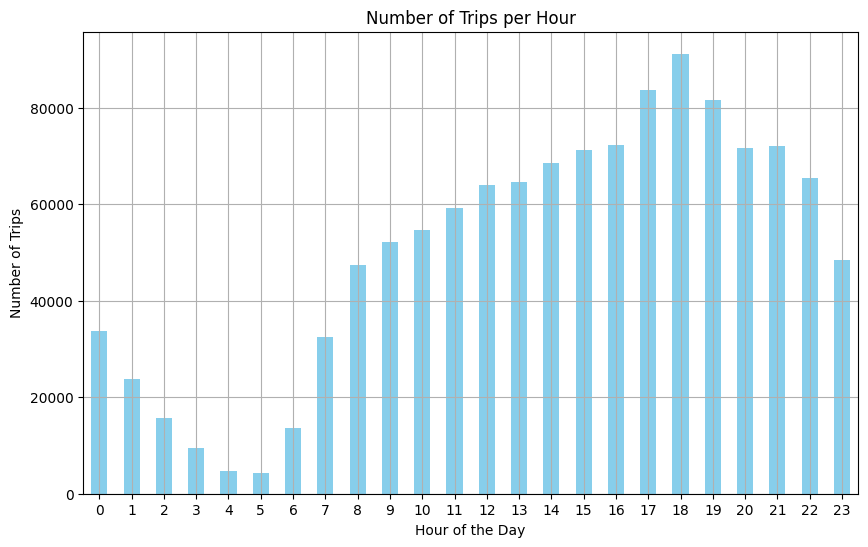

The busiest hour is: 18 with 91167 trips.


In [74]:
# Visualise the number of trips per hour and find the busiest hour

# Group by hour and count the number of trips
trips_per_hour = df1.groupby('hour').size()

plt.figure(figsize=(10, 6))
trips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)  # Make sure the x-axis labels are readable
plt.grid(True)
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
print(f"The busiest hour is: {busiest_hour} with {trips_per_hour.max()} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [75]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05

# Extract the five busiest hours based on the observed number of trips
top_5_busiest_hours = trips_per_hour.sort_values(ascending=False).head(5)

# Scale up the number of trips by the inverse of the sampling ratio
actual_trips_top_5_hours = top_5_busiest_hours / sample_fraction

# Display the actual number of trips in the five busiest hours
print("Actual Number of Trips in the 5 Busiest Hours:")
print(actual_trips_top_5_hours)



Actual Number of Trips in the 5 Busiest Hours:
hour
18    1823340.0
17    1673260.0
19    1631600.0
16    1445360.0
21    1439800.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

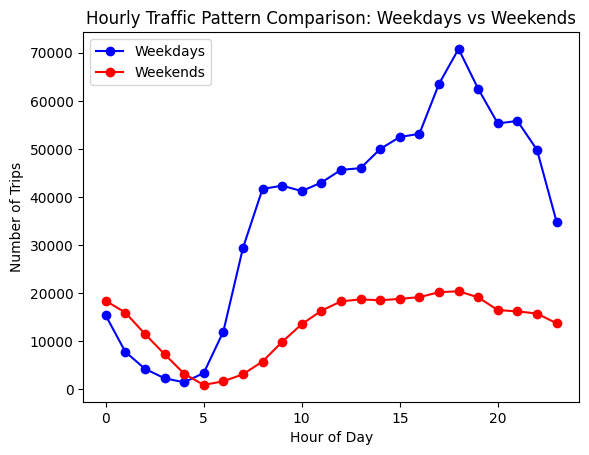

In [76]:
# Compare traffic trends for the week days and weekends
df1['day_type']  =  df1['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Separate the data into weekdays and weekends
df_weekdays = df1[df1['day_type'] == 'Weekday']
df_weekends = df1[df1['day_type'] == 'Weekend']

# Aggregate traffic data by hour for weekdays and weekends
weekdays_traffic = df_weekdays.groupby('hour').size()
weekends_traffic = df_weekends.groupby('hour').size()


# Plot for weekdays
plt.plot(weekdays_traffic.index, weekdays_traffic.values, label='Weekdays', color='blue', marker='o')

# Plot for weekends
plt.plot(weekends_traffic.index, weekends_traffic.values, label='Weekends', color='red', marker='o')

# Add labels and title
plt.title('Hourly Traffic Pattern Comparison: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [77]:
# Find top 10 pickup and dropoff zones

top_10_pick_zones = df1['PULocationID'].value_counts().head(10)
top_10_drop_zones = df1['DOLocationID'].value_counts().head(10)
print("Top 10 pickup zone is :" , top_10_pick_zones)
print("Top 10 drop zone is :", top_10_drop_zones)

Top 10 pickup zone is : PULocationID
237    67101
161    62284
236    60644
162    48911
142    46471
186    44949
170    40271
239    39127
234    38504
230    38396
Name: count, dtype: int64
Top 10 drop zone is : DOLocationID
236    63734
237    59847
161    50487
170    39793
239    39375
142    39105
162    37610
141    37313
234    33291
68     33174
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [82]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Step 1: Count pickups (PULocationID)
pickup_counts = df1['PULocationID'].value_counts()

# Step 2: Count drop-offs (DOLocationID)
dropoff_counts = df1['DOLocationID'].value_counts()

# Step 3: Merge both counts by LocationID (PULocationID and DOLocationID)
pickup_dropoff_counts = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)  # Fill NaN values with 0 in case some zones have no dropoffs or pickups

# Step 4: Compute the ratio of pickups to dropoffs
pickup_dropoff_counts['ratio'] = pickup_dropoff_counts['pickups'] / pickup_dropoff_counts['dropoffs']

# Step 5: Sort the ratios
# 10 highest ratios
top_10_highest_ratios = pickup_dropoff_counts.sort_values(by='ratio', ascending=False).head(10)

# 10 lowest ratios
top_10_lowest_ratios = pickup_dropoff_counts.sort_values(by='ratio', ascending=True).head(10)

# Display the results
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(top_10_highest_ratios[['pickups', 'dropoffs', 'ratio']])

print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest_ratios[['pickups', 'dropoffs', 'ratio']])

Top 10 Zones with Highest Pickup/Dropoff Ratios:
     pickups  dropoffs      ratio
11       1.0       0.0        inf
29       3.0       0.0        inf
77       1.0       0.0        inf
185      1.0       0.0        inf
240      1.0       0.0        inf
212      3.0       0.0        inf
242      2.0       0.0        inf
150      2.0       0.0        inf
138   4277.0     250.0  17.108000
132   2932.0     312.0   9.397436

Top 10 Zones with Lowest Pickup/Dropoff Ratios:
    pickups  dropoffs  ratio
21      0.0       1.0    0.0
20      0.0       1.0    0.0
15      0.0       4.0    0.0
16      0.0       3.0    0.0
31      0.0       1.0    0.0
38      0.0      33.0    0.0
22      0.0       2.0    0.0
51      0.0       2.0    0.0
71      0.0       5.0    0.0
57      0.0       4.0    0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [78]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df1[df['hour'].isin( [0,1,2,3,4,5,23])]
# Top 10 pickup zones during night hours
top_night_pickup_zones = night_hours['PULocationID'].value_counts().head(10)

# Top 10 drop-off zones during night hours
top_night_dropoff_zones = night_hours['DOLocationID'].value_counts().head(10)

# Display the top 10 pickup and dropoff zones during night hours
print("Top 10 Pickup Zones during Night Hours:")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours:
PULocationID
79     12180
249     9822
148     7445
48      7271
114     6896
230     5044
186     4845
164     4413
107     4332
68      4214
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours:
DOLocationID
79     6469
170    4767
48     4765
107    4637
68     4237
141    4199
249    4011
263    3815
229    3433
90     3364
Name: count, dtype: int64


<ipython-input-78-248f332ee8dd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  night_hours = df1[df['hour'].isin( [0,1,2,3,4,5,23])]


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [79]:
# Filter for night hours (11 PM to 5 AM)

df1['Day_or_Night'] =  df1['hour'].apply(lambda x: 'Nighttime' if x in [23,0,1,2,3,4,5] else 'Daytime')



In [80]:
#find the revenue by day and night revenue

revenue_by_day_night  = df1.groupby('Day_or_Night')['total_amount'].sum()
print(revenue_by_day_night)

Day_or_Night
Daytime      22993646.59
Nighttime     3077670.41
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [81]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Calculate fare per mile per passenger
df1['fare_per_mile_per_passenger'] = df1['fare_per_mile'] / df1['passenger_count']

# Group by passenger count and calculate the average fare per mile per passenger
average_fare_per_mile_per_passenger = df1.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Display the results
print(average_fare_per_mile_per_passenger)

passenger_count
1.0    8.362850
2.0    4.173979
3.0    2.829150
4.0    2.188227
5.0    1.603817
6.0    1.360138
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [82]:
# Compare the average fare per mile for different days and for different times of the day



# Classify the time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df1['time_of_day'] = df1['hour'].apply(time_of_day)

# Calculate fare per mile
df1['fare_per_mile'] = df1['fare_amount'] / df1['trip_distance']

# Group by day of the week and time of day, and calculate the average fare per mile
avg_fare_day = df1.groupby('day_of_week')['fare_per_mile'].mean().sort_values(ascending=False)
avg_fare_time_of_day = df1.groupby('time_of_day')['fare_per_mile'].mean().sort_values(ascending=False)

# Display the results
print("Average Fare per Mile by Day of the Week:")
print(avg_fare_day)

print("\nAverage Fare per Mile by Time of the Day:")
print(avg_fare_time_of_day)

Average Fare per Mile by Day of the Week:
day_of_week
Thursday     8.717621
Wednesday    8.707088
Tuesday      8.675409
Friday       8.319494
Saturday     8.119014
Monday       8.092632
Sunday       7.695959
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Time of the Day:
time_of_day
Afternoon    9.199521
Evening      8.478458
Morning      8.374158
Night        7.181554
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [83]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee_final',
       'day_of_week', 'month', 'Quarter', 'trip_duration',
       'trip_duration_minutes', 'day_type', 'Day_or_Night', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'time_of_day'],
      dtype='object')

In [84]:
# Compare fare per mile for different vendors

#Group by vendor_id and calculate the average fare per mile
avg_fare_per_mile_by_vendor = df1.groupby('VendorID')['fare_per_mile'].mean()

#  Display the result
print("Average Fare per Mile by Vendor:")
print(avg_fare_per_mile_by_vendor)

Average Fare per Mile by Vendor:
VendorID
1    8.270285
2    8.399024
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [85]:
# Defining distance tiers
#Create distance tiers
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df1['distance_tier'] = df1['trip_distance'].apply(distance_tier)

# Step 3: Group by vendor_id and distance_tier, then calculate average fare per mile
avg_fare_per_mile_by_vendor_and_tier = df1.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

# Step 4: Display the result
print("Average Fare per Mile by Vendor and Distance Tier:")
print(avg_fare_per_mile_by_vendor_and_tier)


Average Fare per Mile by Vendor and Distance Tier:
distance_tier  2 to 5 miles  More than 5 miles  Up to 2 miles
VendorID                                                     
1                  6.288056           4.739292       9.334578
2                  6.457926           4.817782       9.578570


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [86]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df1['tip_percentage'] =  (df1['tip_amount']/df1['fare_amount'])*100

# Group by distance tier and calculate the average tip percentage
avg_tip_distance = df1.groupby('distance_tier')['tip_percentage'].mean()

# Group by passenger count and calculate the average tip percentage
avg_tip_passenger_count = df1.groupby('passenger_count')['tip_percentage'].mean()

# Group by time of day and calculate the average tip percentage
avg_tip_time_of_day = df1.groupby('time_of_day')['tip_percentage'].mean()

# Display the results
print("Average Tip Percentage by Distance Tier:")
print(avg_tip_distance)

print("\nAverage Tip Percentage by Passenger Count:")
print(avg_tip_passenger_count)

print("\nAverage Tip Percentage by Time of Day:")
print(avg_tip_time_of_day)

Average Tip Percentage by Distance Tier:
distance_tier
2 to 5 miles         23.214578
More than 5 miles    21.605539
Up to 2 miles        28.866744
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_count
1.0    26.837647
2.0    26.741106
3.0    26.642710
4.0    26.817009
5.0    26.652882
6.0    26.816216
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Day:
time_of_day
Afternoon    26.331441
Evening      27.940408
Morning      25.870167
Night        26.974376
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip (Tip Percentage < 10%) Statistics:
        fare_amount  trip_distance  passenger_count          hour  \
count  58343.000000   58343.000000     58343.000000  58343.000000   
mean      16.982708       2.520022         1.353941     14.028932   
std        5.891600       1.332413         0.859754      6.057110   
min        3.000000       0.010000         1.000000      0.000000   
25%       12.100000       1.550000         1.000000     10.000000   
50%       15.600000       2.180000         1.000000     15.000000   
75%       21.200000       3.250000         1.000000     19.000000   
max       31.000000       6.920000         6.000000     23.000000   

       tip_percentage  
count    58343.000000  
mean         6.936392  
std          2.303148  
min          0.032258  
25%          5.882353  
50%          7.407407  
75%          8.771930  
max          9.991942  

High Tip (Tip Percentage > 25%) Statistics:
         fare_amount  trip_distance  passenger_count           hour  \
cou

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


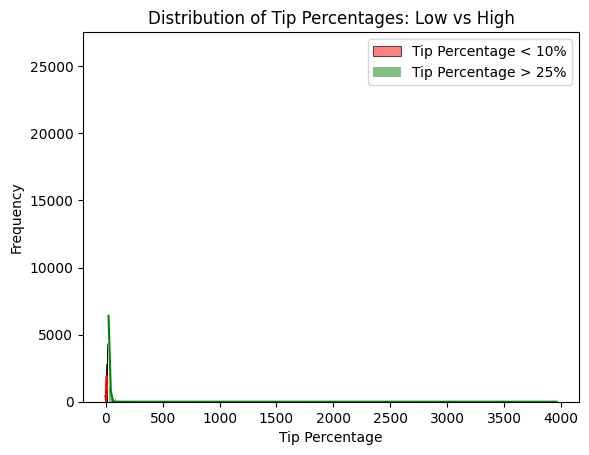

In [87]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

#Filter the data based on tip percentage
low_tip_df = df1[df1['tip_percentage'] < 10]  # Trips with tip < 10%
high_tip_df = df1[df1['tip_percentage'] > 25]  # Trips with tip > 25%

low_tip_stats = low_tip_df[['fare_amount', 'trip_distance', 'passenger_count', 'hour', 'tip_percentage']].describe()
high_tip_stats = high_tip_df[['fare_amount', 'trip_distance', 'passenger_count', 'hour', 'tip_percentage']].describe()

# Display the statistics for comparison
print("Low Tip (Tip Percentage < 10%) Statistics:")
print(low_tip_stats)

print("\nHigh Tip (Tip Percentage > 25%) Statistics:")
print(high_tip_stats)

sns.histplot(low_tip_df['tip_percentage'], kde=True, color='red', label='Tip Percentage < 10%')
sns.histplot(high_tip_df['tip_percentage'], kde=True, color='green', label='Tip Percentage > 25%')

plt.legend()
plt.title("Distribution of Tip Percentages: Low vs High")
plt.xlabel("Tip Percentage")
plt.ylabel("Frequency")
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

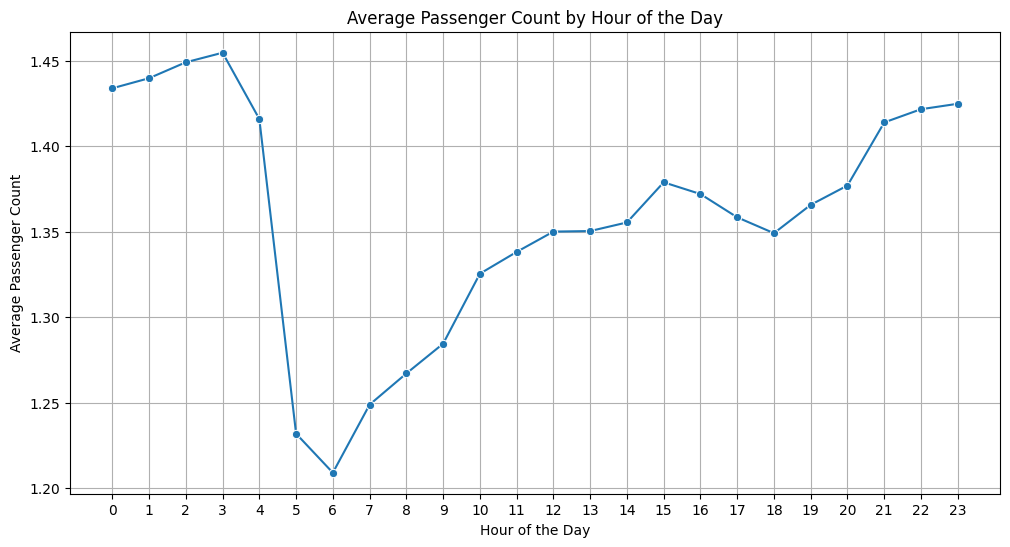

In [88]:
# See how passenger count varies across hours and days
#avg passenger count by hour

avg_passenger_by_hour = df1.groupby('hour')['passenger_count'].mean()
#avg passenger count by day
avg_passenger_by_day = df1.groupby('day_of_week')['passenger_count'].mean()

# Plot average passenger count by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_passenger_by_hour.index, y=avg_passenger_by_hour.values, marker='o')
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))  # 24 hours of the day
plt.grid(True)
plt.show()


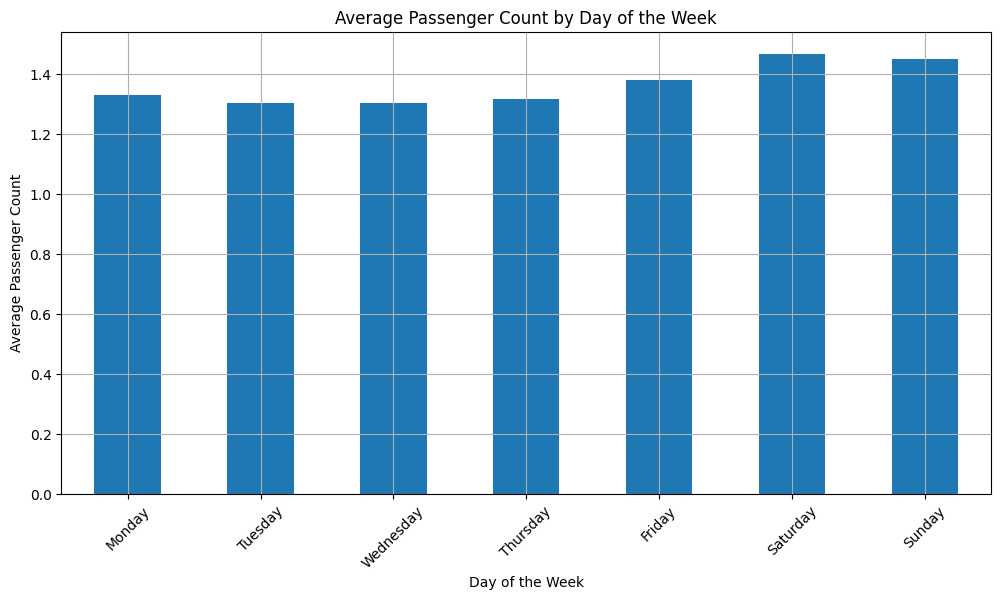

In [91]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_passenger_by_day = avg_passenger_by_day[day_order]
#Plot average passenger count by day of the week
plt.figure(figsize=(12, 6))
avg_passenger_by_day.plot(kind='bar')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [92]:
# How does passenger count vary across zones

df_merged.columns
df_merged.groupby('LocationID')['passenger_count'].sum().sort_values(ascending= False)

LocationID
237    89313.0
161    84413.0
236    81441.0
162    64152.0
142    63819.0
        ...   
185        1.0
203        1.0
208        1.0
180        1.0
240        1.0
Name: passenger_count, Length: 189, dtype: float64

In [93]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_count  = df_merged.groupby('LocationID')['passenger_count'].sum().sort_values(ascending= False)
df_merged =  df_merged.merge(avg_passenger_count, left_on = 'LocationID', right_index=True, how='left')
# Step 3: Rename the new column
df_merged.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Step 4: View the updated GeoDataFrame
df_merged.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count_x  \
0         2  2023-08-01 00:01:37   2023-08-01 00:14:40                1.0   
1         1  2023-08-01 00:07:11   2023-08-01 00:14:27                1.0   
2         2  2023-08-01 00:47:59   2023-08-01 01:10:40                1.0   
3         2  2023-08-01 00:40:07   2023-08-01 00:51:08                1.0   
4         1  2023-08-01 00:26:16   2023-08-01 00:35:48                1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.53         1.0            45            33             1   
1           0.90         1.0           234            68             1   
2           5.59         1.0           234             7             1   
3           3.67         1.0           137            75             1   
4           0.90         1.0           163            50             1   

   fare_amount  ...  trip_duration  trip_duration_minutes  OBJECTID  \
0         14.2  ...          783.0              13.050000        45   
1          8.6  ...          436.0               7.266667       234   
2         27.5  ...         1361.0              22.683333       234   
3         16.3  ...          661.0              11.016667       137   
4          8.6  ...          572.0               9.533333       163   

   Shape_Leng  Shape_Area           zone  LocationID    borough  \
0    0.045907    0.000091      Chinatown          45  Manhattan   
1    0.036072    0.000073       Union Sq         234  Manhattan   
2    0.036072    0.000073       Union Sq         234  Manhattan   
3    0.046108    0.000116       Kips Bay         137  Manhattan   
4    0.034177    0.000041  Midtown North         163  Manhattan   

                                            geometry  passenger_count_y  
0  POLYGON ((984941.821 199431.157, 984958.446 19...             2126.0  
1  POLYGON ((987029.847 207022.299, 987048.27 206...            51895.0  
2  POLYGON ((987029.847 207022.299, 987048.27 206...            51895.0  
3  POLYGON ((991954.728 209026.462, 991949.076 20...            19116.0  
4  POLYGON ((989412.663 219020.943, 990045.841 21...            52119.0  

[5 rows x 33 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [94]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'date', 'hour', 'airport_fee_final',
       'day_of_week', 'month', 'Quarter', 'trip_duration',
       'trip_duration_minutes', 'day_type', 'Day_or_Night', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'time_of_day', 'distance_tier',
       'tip_percentage'],
      dtype='object')

In [95]:
# How often is each surcharge applied?
# List of surcharge-related columns
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_final']

# Dictionary to store the frequency of each surcharge
surcharge_counts = {}

# Calculate how often each surcharge was applied
for col in surcharge_columns:
    surcharge_counts[col] = (df1[col] > 0).sum()

# Display the frequency of each surcharge
print(surcharge_counts)

{'extra': np.int64(758336), 'mta_tax': np.int64(1204893), 'tolls_amount': np.int64(3762), 'improvement_surcharge': np.int64(1205640), 'congestion_surcharge': np.int64(1179966), 'airport_fee_final': np.int64(7447)}


<ipython-input-96-491c1c18991c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Surcharge Type', y='Frequency', data=surcharge_df, palette='viridis')


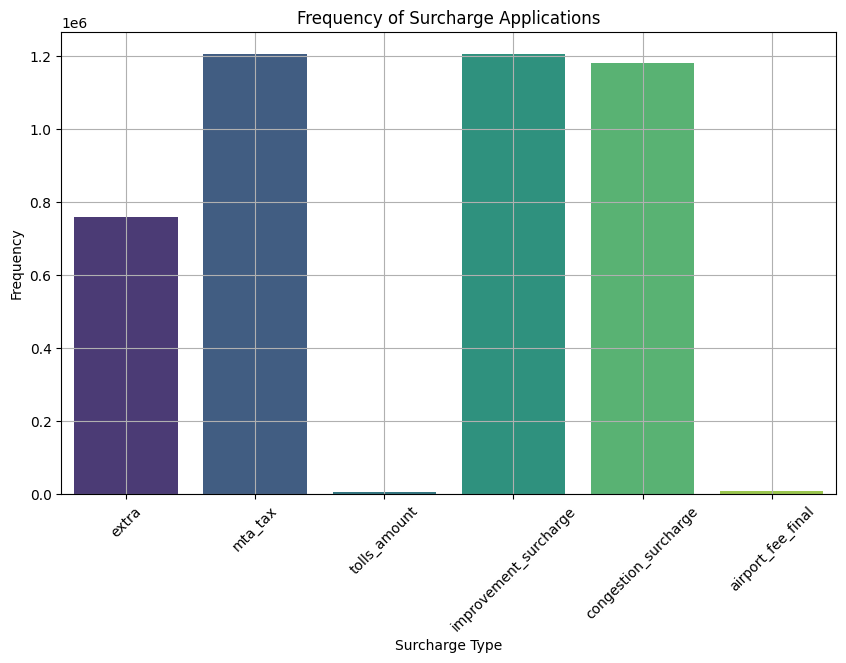

In [96]:
# Convert the surcharge counts to a DataFrame for visualization
surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge Type', 'Frequency'])

# Plot the frequency of each surcharge
plt.figure(figsize=(10, 6))
sns.barplot(x='Surcharge Type', y='Frequency', data=surcharge_df, palette='viridis')
plt.title('Frequency of Surcharge Applications')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

#Peak hours
### The peak hour of the day occurs at 6 PM.

#Daily Trends
### Fridays have the highest trip counts recorded.

#Mothly Trends
### April has seen the highest number of trips for the year.

#Monthly Revenue
### October, being the festival month, has recorded the highest revenue.

#Quartely Revenue
### The 4th quarter has generated the highest revenue.

#Correlation between Trip distance and fare amount
### As the trip distance increases, the fare amount also increases.

# correlation between fare and trip duration
### There is no significant correlation between fare amount and trip duration.

#Correlation between tip amount and trip distance
### Longer trip distances are associated with higher tip amounts.

#PPreferable Payment type
### Credit cards are the most commonly used payment method.

# Passenger count
### Weekends experience the highest passenger counts.

#Location
### Location 237 has the highest passenger count.

#surcharge analysis
### The MTA tax is the most dominant surcharge applied.


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

 Focus on maximizing vehicle availability during peak hours (e.g., 6 PM) when demand is highest. Deploy more vehicles in high-demand areas during these times to minimize wait times for customers and ensure quicker response times.

 Fridays, which have the highest trip counts, and festival months like October, which generate the highest revenue, should be prioritized for optimized fleet management and resource allocation.

 During high-demand days or months, offer special promotions or incentives to drivers in these peak periods to ensure there is enough supply to meet demand.

 Longer trip distances typically correlate with higher fares. You can optimize route planning by ensuring that drivers take the most efficient routes for longer trips to minimize time and fuel consumption while maximizing fares.

 The lack of correlation between fare and trip duration suggests that some trips may take longer than expected without corresponding fare increases. Identifying these inefficiencies will help in improving the system.

 Monitor trip durations and fares for outliers, investigate whether routes or operational inefficiencies (e.g., unnecessary detours, traffic congestion) are causing longer-than-expected trip times, and adjust algorithms accordingly.

 Longer trip distances tend to yield higher tip amounts, suggesting that routes with longer trips should be prioritized during peak hours or in areas with a history of higher tips.

 Weekends tend to have higher passenger counts, and specific zones (like Location 237) show consistent high demand. To optimize supply and demand, deploy more vehicles in busy zones during weekends

 As credit cards are the most preferred payment method, ensuring that the payment system is optimized and convenient for customers who prefer electronic payments will improve user experience and operational efficiency.

 MTA tax is a dominant surcharge in your data. Understanding and predicting surcharge trends will help in setting correct pricing strategies

 The 4th quarter generates the highest revenue, so ensure that the company is well-prepared for increased demand during this period.

 Hire additional drivers, offer driver incentives, and ensure that vehicles are in top condition to handle the expected increase in trips during the 4th quarter.

 Location 237, with the highest passenger count, is a key area of focus. Ensure that this zone is adequately serviced by taxis during peak hours.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Position cabs in high-traffic zones during peak hours (e.g., 6 PM) and weekends for maximum demand.

Deploy vehicles near transportation hubs during high-demand months like April and festival seasons in October.

Focus on areas generating long trips (e.g., airports, tourist spots) for higher fares and tips.

Use time-of-day-based positioning: daytime for office zones and nighttime for entertainment areas.

Position extra vehicles near Location 237, which consistently shows the highest passenger counts.

Optimize routes dynamically using real-time traffic data to reduce delays and improve efficiency.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Dynamic Pricing for Peak Hours: Implement surge pricing during high-demand periods (e.g., 6 PM, weekends) to capture more revenue.

Time-of-Day Pricing: Adjust fares based on time (e.g., lower rates for late night, higher rates during rush hours).

Distance-Based Pricing: Introduce tiered fares for different distance brackets (e.g., <2 miles, 2-5 miles, >5 miles).

Seasonal/Event-Based Pricing: Increase fares during peak months and special events (e.g., festivals, holidays) to capitalize on higher demand.

Passenger Count Discounts: Offer group discounts for larger parties (e.g., 3+ passengers) to encourage longer trips and maximize capacity.

Monitor Competitor Pricing: Continuously track competitor rates and adjust your prices to remain competitive.

